#Exploratory data analysis
check for the number of missing values for each column
check the data types of each column
change the date data type from object to date
check the values under the category column
use seaborn to visualize the categories

#data analysis
How long do people travel with Uber
what hour do most people take uber to their destination
visualize the number of trips vs hours
check the purpose of trips
Which day has the highest number of trips
visualize the days
what are the numbers of trips per each day
what are the trips in the months
where do people board from most

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('uber.csv')
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
df=df.drop(1155,axis=0)

In [6]:
df['START_DATE*']=pd.to_datetime(df['START_DATE*'])
df['END_DATE*']=pd.to_datetime(df['END_DATE*'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [8]:
df['CATEGORY*']

0       Business
1       Business
2       Business
3       Business
4       Business
          ...   
1150    Business
1151    Business
1152    Business
1153    Business
1154    Business
Name: CATEGORY*, Length: 1155, dtype: object

In [9]:
category=df['CATEGORY*'].value_counts()
category

Business    1078
Personal      77
Name: CATEGORY*, dtype: int64

<AxesSubplot:>

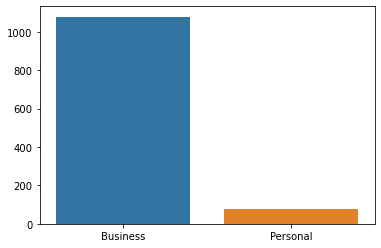

In [10]:
sb.barplot(x=category.index,y=category.values)

In [11]:
df['Travel_Duration']=df['END_DATE*']-df['START_DATE*']
df['Travel_Duration']

0      0 days 00:06:00
1      0 days 00:12:00
2      0 days 00:13:00
3      0 days 00:14:00
4      0 days 01:07:00
             ...      
1150   0 days 00:07:00
1151   0 days 00:18:00
1152   0 days 00:35:00
1153   0 days 00:18:00
1154   0 days 01:43:00
Name: Travel_Duration, Length: 1155, dtype: timedelta64[ns]

In [12]:
df['Start_Hour']=df['START_DATE*'].dt.hour
df['End_Hour']=df['END_DATE*'].dt.hour

In [13]:
df['Start_Hour']

0       21
1        1
2       20
3       17
4       14
        ..
1150     1
1151    13
1152    15
1153    21
1154    22
Name: Start_Hour, Length: 1155, dtype: int64

In [14]:
hour_count=df.groupby('Start_Hour').size()
most_hour=hour_count.idxmax()
most_hour

15

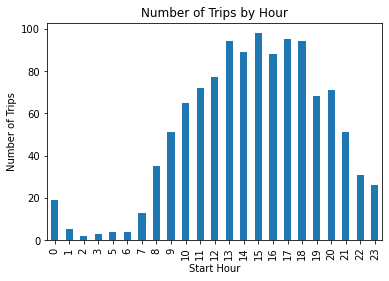

In [15]:
hour_count.plot(kind='bar')
plt.xlabel('Start Hour')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Hour')
plt.show()

In [16]:
purpose=df['PURPOSE*'].unique()
purpose

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [17]:
df['Date']=df['START_DATE*'].dt.date
df['Date']=pd.to_datetime(df['Date'])

In [24]:
days=df.groupby('Date').size()
highest_day=days.idxmax()
highest_day

Timestamp('2016-12-29 00:00:00')

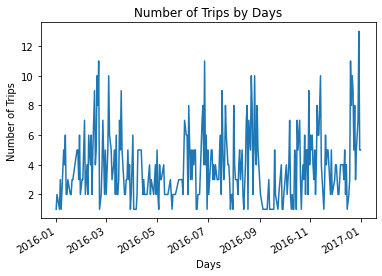

In [19]:
days.plot(kind='line')
plt.xlabel('Days')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Days')
plt.show()

In [20]:
daily_trips=days.sort_values(ascending=False)
daily_trips.head(20)

Date
2016-12-29    13
2016-06-27    11
2016-12-19    11
2016-02-21    11
2016-03-04    10
2016-12-21    10
2016-02-19    10
2016-11-13    10
2016-08-26    10
2016-08-22    10
2016-02-16     9
2016-03-19     9
2016-12-22     9
2016-07-18     9
2016-10-30     9
2016-11-12     8
2016-11-09     8
2016-08-29     8
2016-08-23     8
2016-02-20     8
dtype: int64

In [21]:
df['Month']=df['Date'].dt.month
monthly_trips=df.groupby('Month').size()
monthly_trips

Month
1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
dtype: int64

In [22]:
boarding=df['START*'].value_counts()
most_boarding=boarding.head()
most_boarding

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Name: START*, dtype: int64